In [1]:
import pandas as pd
df = pd.read_csv('title_abstract.csv')

In [3]:
df

,Unnamed: 0,title,abstract
0,0,3GIO.,NaN
1,1,The relationship between canopy parameters and...,Drought is the first place in all the natural ...
2,2,A solution to the problem of touching and brok...,NaN
3,3,Timing yield estimation using statistical stat...,As process variations become a significant pro...
4,4,360°,360° represents the concerns that are addresse...
...,...,...,...
299996,299996,Distributed Web2.0 crawling for ontology evolu...,NaN
299997,299997,Human activity modeling by spatio temporal tex...,We propose to model the human activity in spac...
299998,299998,Usable verification of object-oriented program...,With formal techniques becoming more and more ...
299999,299999,Utilisation de SysML pour la modélisation des ...,NaN


In [4]:
df = df.dropna()

In [5]:
print(df.shape)

(204837, 3)


In [6]:
#dropping  the duplicates column if any using drop duplicates from pandas
sorted_data=df.sort_values('title', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"title","abstract"}, keep='first', inplace=False)
final.shape

(204625, 3)

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))



def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'ma', 'if', 'such', 'who', 'y', 'in', "mightn't", 'yourselves', 'was', 'her', 'be', 'all', 'been', 'both', 'same', 'at', 'than', "mustn't", 'having', 'their', 'but', 'isn', 'under', 'why', 'i', 'after', 'weren', 've', 'wouldn', 'about', 's', 'down', 'don', 'some', 'just', 'no', 'll', 'before', "doesn't", 'an', 'of', 'are', 'this', 'further', 'there', 'did', "hadn't", "haven't", "you're", 'he', 'with', "don't", "she's", 'then', 'hadn', 'off', 'as', 'himself', 'not', 'won', 'because', 'those', 'd', 'hers', "it's", 'each', 'them', 'few', 'most', 'other', "shouldn't", 'wasn', 'they', "you've", 'which', "wasn't", 'itself', 'a', 'hasn', 'that', "that'll", 'now', 'mustn', 'only', 'or', 'how', "won't", 'between', 'am', "you'd", 'what', 'doesn', "shan't", 'into', 'by', 'nor', 'whom', 'shouldn', 're', 'very', 'myself', 'these', 'ain', "hasn't", 'any', 'when', 'too', "you'll", 'so', 'again', 'him', 'she', "needn't", 'on', 'is', 'during', 'his', 'ours', 'above', 'needn', 'being', 'o', 'until', 'o

[nltk_data] Downloading package stopwords to /Users/oleg-
[nltk_data]     nai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import re
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['abstract'].values:
    filtered_sentence=[]
    #print(sent);
#     sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1
final['CleanedAbstract']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedAbstract']=final['CleanedAbstract'].str.decode("utf-8")

/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/3628265757.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedAbstract']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review
/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/3628265757.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedAbstract']=final['CleanedAbstract'].str.decode("utf-8")


In [9]:
final.shape # cleaned text column added

(204625, 4)

In [10]:
final.head(3)

,Unnamed: 0,title,abstract,CleanedAbstract
103604,103604,Compositional Hazard Analysis of UML Componen...,The general trend towards complex technical s...,general trend toward complex technic system em...
36275,36275,Dynamic Contract Layers,Design by Contract (DBC) is a programming tech...,design contract dbc program techniqu separ con...
297493,297493,From model transformation to incremental bidi...,The model-driven software development paradig...,softwar develop paradigm requir appropri model...


In [11]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['title'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [12]:
final['CleanedTitle']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedTitle']=final['CleanedTitle'].str.decode("utf-8")

/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/2142408653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedTitle']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review
/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/2142408653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedTitle']=final['CleanedTitle'].str.decode("utf-8")


In [13]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['CleanedAbstract'].values)
bow.shape

(204625, 159742)

In [14]:
bow

<204625x159742 sparse matrix of type '<class 'numpy.int64'>'
	with 10433755 stored elements in Compressed Sparse Row format>

In [15]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

/Users/oleg-nai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
#first 10 columns generated by BOW
terms[1:10]

['aaa',
 'aaaa',
 'aaaaa',
 'aaaacommunica',
 'aaac',
 'aaai',
 'aaam',
 'aab',
 'aabb']

In [17]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [18]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [19]:
cluster_center

array([[0.00000000e+00, 3.93804148e-04, 0.00000000e+00, ...,
        1.31268049e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.37191301e-04, 6.63472171e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.91632066e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.68889486e-04, 6.72223716e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15200737e-05, 1.49760958e-04, 1.15200737e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [20]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [21]:
# which tells us that clusters are far away from each other 
silhouette_score

0.021426486860358123

In [22]:
# Giving Labels/assigning a cluster to each point/text 
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/2512822080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers


,Unnamed: 0,title,abstract,CleanedAbstract,CleanedTitle,Bow Clus Label
103604,103604,Compositional Hazard Analysis of UML Componen...,The general trend towards complex technical s...,general trend toward complex technic system em...,composit hazard analysi uml compon deploy model,4
36275,36275,Dynamic Contract Layers,Design by Contract (DBC) is a programming tech...,design contract dbc program techniqu separ con...,dynam contract layer,6


In [23]:
df.groupby(['Bow Clus Label'])['title'].count()

Bow Clus Label
0     7618
1       21
2     2713
3    12001
4    15281
5     8431
6    41224
7    15655
8    14876
9    86805
Name: title, dtype: int64

In [24]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: data
 use
 system
 paper
 set
 method
 propos
 inform
 algorithm
 model
Cluster 1: use
 function
 comput
 set
 system
 one
 point
 group
 data
 method
Cluster 2: servic
 web
 provid
 use
 user
 applic
 system
 paper
 model
 propos
Cluster 3: model
 use
 system
 paper
 propos
 process
 approach
 base
 result
 present
Cluster 4: system
 use
 paper
 design
 control
 model
 develop
 perform
 present
 inform
Cluster 5: network
 node
 use
 propos
 paper
 perform
 result
 rout
 protocol
 wireless
Cluster 6: use
 paper
 design
 approach
 result
 inform
 system
 present
 develop
 perform
Cluster 7: algorithm
 problem
 use
 propos
 time
 optim
 result
 paper
 comput
 present
Cluster 8: method
 imag
 use
 propos
 result
 paper
 base
 featur
 algorithm
 approach
Cluster 9: paper
 use
 present
 system
 result
 problem
 set
 comput
 show
 model


/Users/oleg-nai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


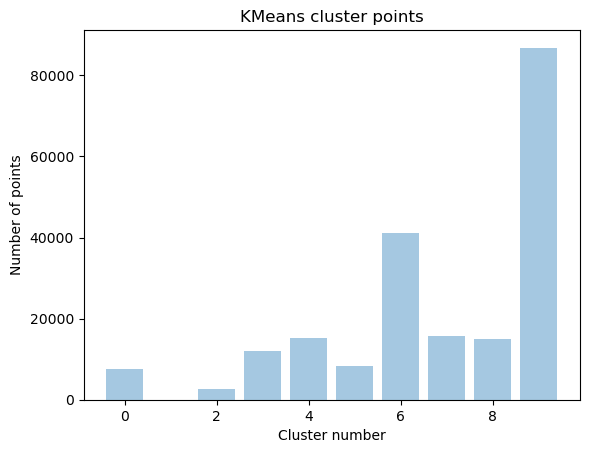

In [25]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['abstract'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [27]:

for i in range(9):
    print("Обзор статей, отнесенных к кластеру ", i)
    print("-" * 70)
    print(df.iloc[:df.groupby(['Bow Clus Label']).groups[0][i]]['abstract'])
    print('\n')
    print("_" * 70)

Обзор статей, отнесенных к кластеру  0
----------------------------------------------------------------------
103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering community has de...
201515    In typical classification tasks, we seek a fun...
                                ...                        
211576    Many computer science departments are debating...
153128    In this paper, an Hfrinfin/LPV observer to be ...
271444    This paper studies the ℒ2 (mean-square) optima...
217880    In this paper, the problem of ℓ1-induced contr...
70057     A new stationary subdivision scheme is present...
Name: abstract, Length: 204625, dtype: object


______________________________________________________________________
Обзор статей, отнесенных к кластеру  1
----------------------------------------------------------------------
1

In [28]:
#3 рандомных примера из кластера 0

print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][3]]['abstract'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][15]]['abstract'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][25]]['abstract'])

The communication techniques used amongst agents in a system is critical to the effectiveness and success of collaboration based actions. Agents which fail to store or communicate information in an effective uniform manner will not be able to accomplish their goals. The aim of the paper is to determine the particular difficulties relating to agent information representation and reconstruction. In addition the paper will discuss whether or not it is profitable for agents to be equipped with the ability to modify their communication style.
______________________________________________________________________
Simulated evolution on a computer can provide a means for generating appropriate tactics in real-time combat scenarios. Individual unit or higher level organizations, such as tanks and platoons, can use evolutionary computation to adapt to the current and projected situations. In this article, we briefly review current knowledge in evolutionary algorithms and offer an example of app

In [30]:
#3 рандомных примера из кластера 3

print(df.iloc[:df.groupby(['Bow Clus Label']).groups[3][3]]['abstract'])
print("_" * 70)
print(df.iloc[:df.groupby(['Bow Clus Label']).groups[3][15]]['abstract'])
print("_" * 70)
print(df.iloc[:df.groupby(['Bow Clus Label']).groups[3][25]]['abstract'])

103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering community has de...
201515    In typical classification tasks, we seek a fun...
                                ...                        
211576    Many computer science departments are debating...
153128    In this paper, an Hfrinfin/LPV observer to be ...
271444    This paper studies the ℒ2 (mean-square) optima...
217880    In this paper, the problem of ℓ1-induced contr...
70057     A new stationary subdivision scheme is present...
Name: abstract, Length: 204625, dtype: object
______________________________________________________________________
103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering com

In [32]:
#3 рандомных примера из кластера 4

print(df.iloc[:df.groupby(['Bow Clus Label']).groups[4][3]]['abstract'])
print("_" * 70)
print(df.iloc[:df.groupby(['Bow Clus Label']).groups[4][15]]['abstract'])
print("_" * 70)
print(df.iloc[:df.groupby(['Bow Clus Label']).groups[4][25]]['abstract'])

103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering community has de...
201515    In typical classification tasks, we seek a fun...
                                ...                        
211576    Many computer science departments are debating...
153128    In this paper, an Hfrinfin/LPV observer to be ...
271444    This paper studies the ℒ2 (mean-square) optima...
217880    In this paper, the problem of ℓ1-induced contr...
70057     A new stationary subdivision scheme is present...
Name: abstract, Length: 204625, dtype: object
______________________________________________________________________
103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering com

K means using TFIDF

In [33]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(final['CleanedAbstract'].values)
tfidf.shape

(204625, 159742)

In [34]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 8,random_state=99)
model_tf.fit(tfidf)

KMeans(random_state=99)

In [35]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [36]:
cluster_center_tf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16762130e-05, 1.28366379e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.10790112e-05, 2.18563675e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.28775786e-05, 0.00000000e+00],
       ...,
       [7.19734888e-06, 1.93702887e-05, 1.25021879e-05, ...,
        2.65872457e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.95020182e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.39627891e-05, 9.21998710e-06, 0.00000000e+00, ...,
        9.11656135e-06, 0.00000000e+00, 9.30935770e-06]])

In [37]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

/Users/oleg-nai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
terms1[1:10]

['aaa',
 'aaaa',
 'aaaaa',
 'aaaacommunica',
 'aaac',
 'aaai',
 'aaam',
 'aab',
 'aabb']

In [39]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [40]:
silhouette_score_tf

0.00664583536422121

In [41]:
# Giving Labels/assigning a cluster to each point/text 
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/4114300390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


,Unnamed: 0,title,abstract,CleanedAbstract,CleanedTitle,Bow Clus Label,Tfidf Clus Label
103604,103604,Compositional Hazard Analysis of UML Componen...,The general trend towards complex technical s...,general trend toward complex technic system em...,composit hazard analysi uml compon deploy model,4,7
36275,36275,Dynamic Contract Layers,Design by Contract (DBC) is a programming tech...,design contract dbc program techniqu separ con...,dynam contract layer,6,5
297493,297493,From model transformation to incremental bidi...,The model-driven software development paradig...,softwar develop paradigm requir appropri model...,model transform increment bidirect model synchron,3,7
65386,65386,Incremental Model Synchronization for Efficie...,The model-driven engineering community has de...,engin communiti develop express model transfor...,increment model synchron effici monitor,3,7
201515,201515,Max-Margin Markov Networks,"In typical classification tasks, we seek a fun...",typic classif task seek function assign label ...,markov network,8,4


In [42]:
df1.groupby(['Tfidf Clus Label'])['abstract'].count()

Tfidf Clus Label
0     1167
1     8924
2    13183
3    31662
4    33568
5    79986
6     5165
7    30970
Name: abstract, dtype: int64

In [43]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(8):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: abstract
 without
 avail
 graphic
 subscript
 model
 program
 refin
Cluster 1: imag
 method
 segment
 use
 propos
 featur
 object
 algorithm
Cluster 2: network
 node
 wireless
 protocol
 rout
 sensor
 traffic
 mobil
Cluster 3: user
 servic
 inform
 data
 web
 system
 use
 technolog
Cluster 4: algorithm
 problem
 method
 optim
 propos
 use
 data
 result
Cluster 5: use
 paper
 result
 model
 set
 system
 present
 function
Cluster 6: graph
 vertic
 edg
 vertex
 number
 problem
 algorithm
 subgraph
Cluster 7: system
 model
 program
 softwar
 design
 languag
 use
 develop


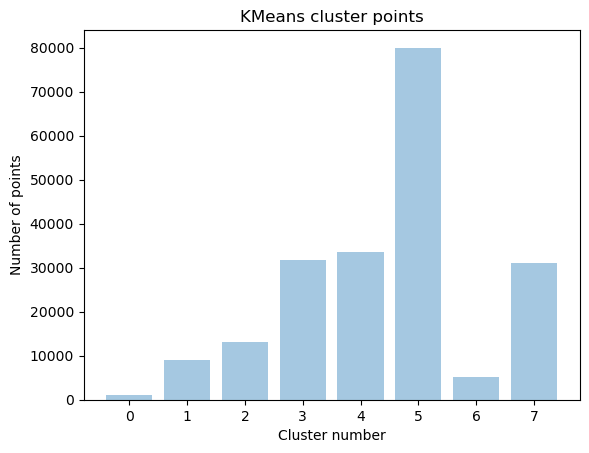

In [44]:
# visually how points or reviews are distributed across 10 clusters 

plt.bar([x for x in range(8)], df1.groupby(['Tfidf Clus Label'])['abstract'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [46]:
# Reading a review which belong to each group.
for i in range(7):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[:df1.groupby(['Tfidf Clus Label']).groups[i][5]]['abstract'])
    print('\n')
    print(df1.iloc[:df1.groupby(['Tfidf Clus Label']).groups[i][10]]['abstract'])
    print('\n')
    print(df1.iloc[:df1.groupby(['Tfidf Clus Label']).groups[i][20]]['abstract'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering community has de...
201515    In typical classification tasks, we seek a fun...
                                ...                        
211576    Many computer science departments are debating...
153128    In this paper, an Hfrinfin/LPV observer to be ...
271444    This paper studies the ℒ2 (mean-square) optima...
217880    In this paper, the problem of ℓ1-induced contr...
70057     A new stationary subdivision scheme is present...
Name: abstract, Length: 204625, dtype: object


103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386 

Average Word to Vector

In [47]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedAbstract'].values:
    list_of_sent.append(sent.split())

In [48]:
print(final['CleanedAbstract'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

general trend toward complex technic system embed softwar result increas demand depend high qualiti softwar uml advanc technolog provid principl essenti concept requir handl increas complex softwar system howev current forthcom uml version direct appli outlin problem avail hazard analysi techniqu hand provid requir degre integr softwar design notat narrow gap system develop uml techniqu present approach support composit hazard analysi uml model describ restrict compon deploy diagram approach permit systemat identifi hazard failur serious compon set compon requir detail safeti analysi restrict failur propag assum uml design
*****************************************************************
['general', 'trend', 'toward', 'complex', 'technic', 'system', 'embed', 'softwar', 'result', 'increas', 'demand', 'depend', 'high', 'qualiti', 'softwar', 'uml', 'advanc', 'technolog', 'provid', 'principl', 'essenti', 'concept', 'requir', 'handl', 'increas', 'complex', 'softwar', 'system', 'howev', 'cur

In [49]:
# removing html tags and apostrophes if present.
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [51]:
i=0
list_of_sent_train=[]
for sent in final['CleanedAbstract'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [52]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,vector_size=100, workers=4)

In [53]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/2068892558.py:13: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(204625, 100)

K Means CLustering for Avg word to vectors

In [54]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

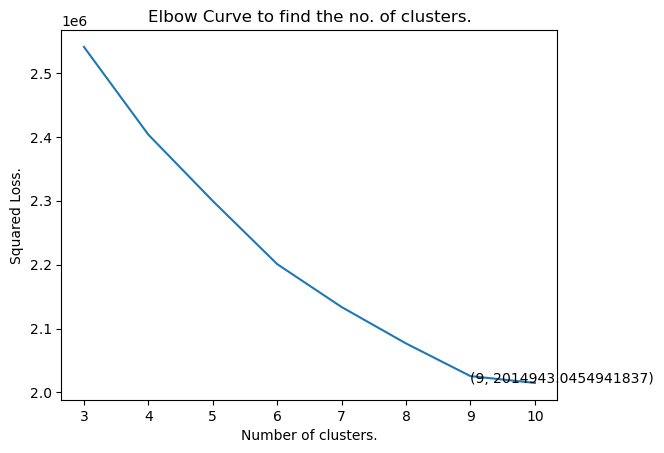

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  2014943.0454941837


In [56]:
# Choosing the best cluster using Elbow Method.
# source credit,few parts of min squred loss info is taken from different parts of the stakoverflow answers.
# this is used to understand to find the optimal clusters in differen way rather than used in BOW, TFIDF
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [57]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(n_clusters=9)

In [58]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [59]:
word_cluster_center[1:2]

array([[ 0.15251948, -0.41832125, -0.19050577, -0.52653976, -0.15903646,
         0.21667679,  0.00722519, -1.01976214,  0.05962628,  0.25945308,
         0.52211073,  0.30138975, -0.4403048 , -0.316137  , -0.58157505,
         0.23133526, -0.30062571, -0.32480355,  0.31609182,  1.09520505,
        -0.07810814, -0.40103845, -0.4683024 ,  0.37298014, -0.02489108,
         0.04432019,  0.65845446,  1.0030659 ,  0.35043859,  0.29754366,
         0.01970572, -0.1764859 , -0.27529041, -0.38645687, -0.24938351,
        -1.12342262,  0.2880806 , -0.13939865,  0.46150343,  0.37830345,
        -0.47678749,  0.20099577, -0.32601752,  0.21969437,  0.07189355,
         0.42826009,  0.34056367,  0.39411466, -0.1684496 , -0.08492685,
         0.2251376 ,  0.23398275, -0.22259818,  0.03116284, -0.19123434,
        -0.11553995,  0.07802882,  0.15805709,  0.38385645,  0.18765992,
        -0.30334838,  0.31706381, -0.46067785, -0.22092163,  0.30021838,
        -0.10276712,  0.08529956,  0.05376149,  0.2

In [60]:
# Giving Labels/assigning a cluster to each point/text 
dfa = df1
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)

/var/folders/1d/1ltz4mh92w75fs8jnyghsh900000gn/T/ipykernel_84520/2239402926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['AVG-W2V Clus Label'] = model2.labels_


,Unnamed: 0,title,abstract,CleanedAbstract,CleanedTitle,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103604,103604,Compositional Hazard Analysis of UML Componen...,The general trend towards complex technical s...,general trend toward complex technic system em...,composit hazard analysi uml compon deploy model,4,7,4
36275,36275,Dynamic Contract Layers,Design by Contract (DBC) is a programming tech...,design contract dbc program techniqu separ con...,dynam contract layer,6,5,4


In [61]:
# How many points belong to each cluster ->
dfa.groupby(['AVG-W2V Clus Label'])['abstract'].count()

AVG-W2V Clus Label
0    29316
1    37306
2     1151
3    26999
4    36786
5    16402
6     1461
7    31783
8    23421
Name: abstract, dtype: int64

In [62]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[:dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['abstract'])
    print('\n')
    print(dfa.iloc[:dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['abstract'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386      The model-driven engineering community has de...
201515    In typical classification tasks, we seek a fun...
                                ...                        
211576    Many computer science departments are debating...
153128    In this paper, an Hfrinfin/LPV observer to be ...
271444    This paper studies the ℒ2 (mean-square) optima...
217880    In this paper, the problem of ℓ1-induced contr...
70057     A new stationary subdivision scheme is present...
Name: abstract, Length: 204625, dtype: object


103604     The general trend towards complex technical s...
36275     Design by Contract (DBC) is a programming tech...
297493     The model-driven software development paradig...
65386 

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [65]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

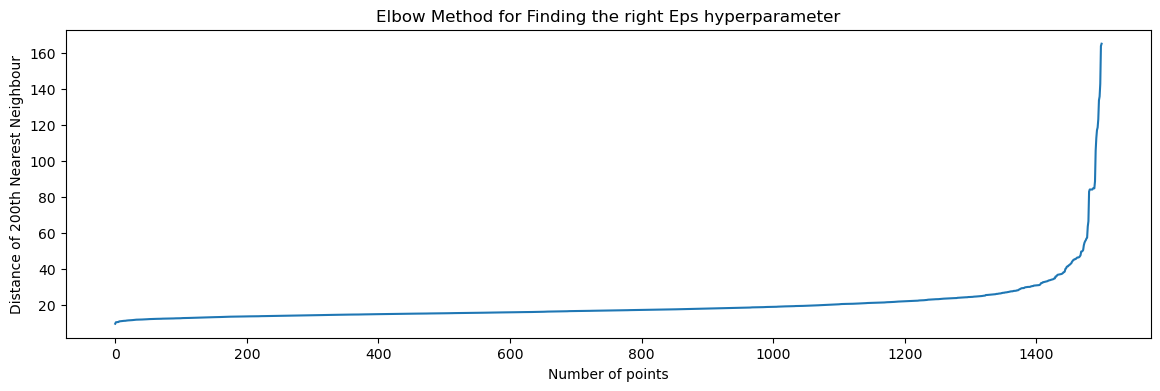

In [66]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [1]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

NameError: name 'DBSCAN' is not defined

In [ ]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

In [ ]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

Clustering Hierarchical

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

In [ ]:
# How many points belong to each cluster ->
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()